Spatial Filtering and its type
filter = lọc bỏ những thứ không cần thiết để làm nổi bật những thứ mình quan tâm

Bộ lọc point to point (dùng làm mờ ảnh)
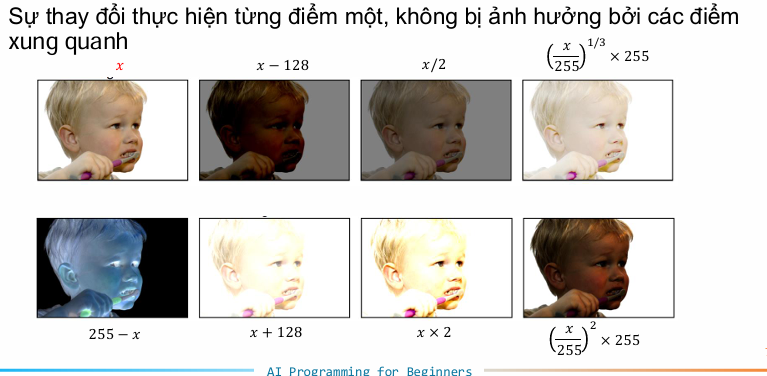


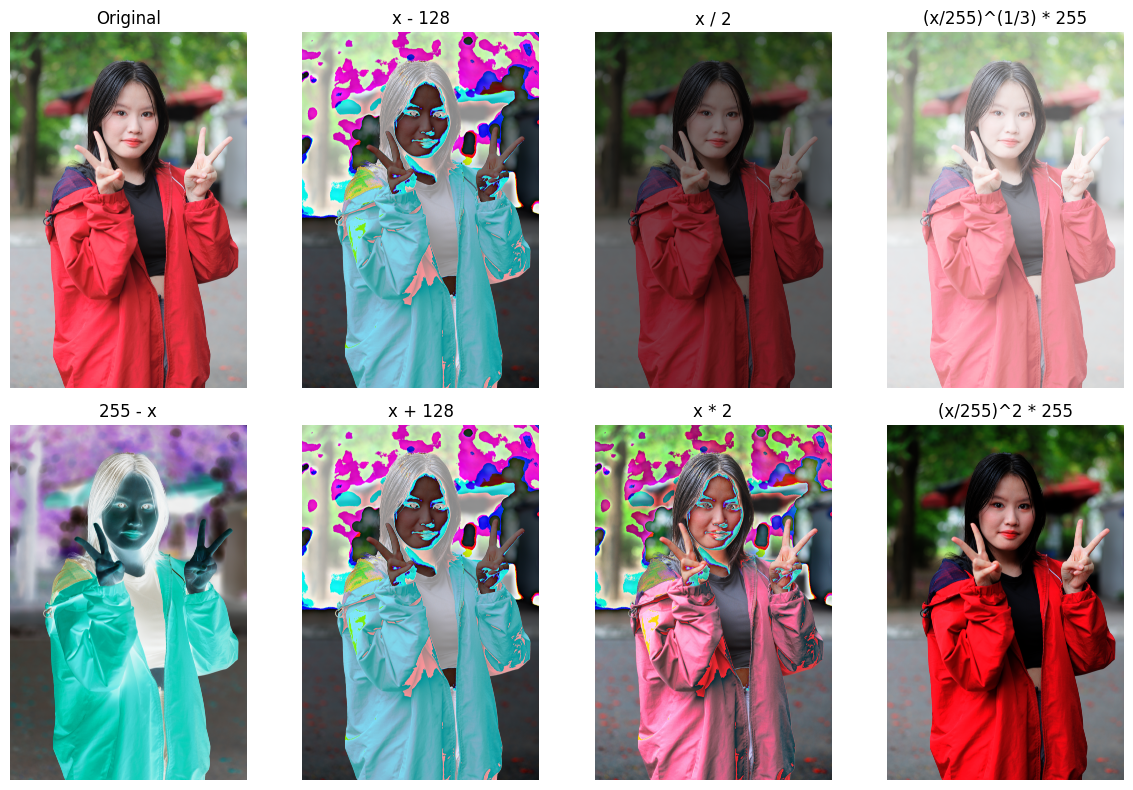

In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def apply_point_to_point_transform(image_path):
    # Kiểm tra xem ảnh có tồn tại không
    if not os.path.exists(image_path):
        raise ValueError(f"Tệp ảnh không tồn tại: {image_path}. Kiểm tra đường dẫn!")
    
    # Đọc ảnh ở chế độ màu
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Không thể đọc ảnh: {image_path}. Kiểm tra định dạng tệp!")
    
    # Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Áp dụng các phép biến đổi trên từng kênh màu (B, G, R)
    transformations = {
        "x - 128": np.clip(image - 128, 0, 255),
        "x / 2": np.clip(image / 2, 0, 255).astype(np.uint8),
        "(x/255)^(1/3) * 255": np.clip((image / 255) ** (1/3) * 255, 0, 255).astype(np.uint8),
        "255 - x": 255 - image,
        "x + 128": np.clip(image + 128, 0, 255),
        "x * 2": np.clip(image * 2, 0, 255).astype(np.uint8),
        "(x/255)^2 * 255": np.clip((image / 255) ** 2 * 255, 0, 255).astype(np.uint8),
    }

    # Hiển thị kết quả
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 4, 1)
    plt.imshow(image_rgb)
    plt.title("Original")
    plt.axis("off")
    
    for i, (title, transformed) in enumerate(transformations.items(), start=2):
        transformed_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)  # Chuyển đổi ảnh sau biến đổi sang RGB
        plt.subplot(2, 4, i)
        plt.imshow(transformed_rgb)
        plt.title(title)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng
image_path = "image.jpg"  # Thay bằng đường dẫn ảnh của bạn
apply_point_to_point_transform(image_path)



In [ ]:
LINEAR SPATIAL FILTER(bộ lọc dịch chuyển tuyến tính)
Thay giá trị mỗi ô bằng tổ hợp tuyến tính của các ô xung quang(bao gồm cả chính nó). Được thực hiên bằng cách nhân mỗi phần của ảnh với bộ lọc.
Ví dụ: bộ lọc 3x3
![image.png](attachment:image.png)

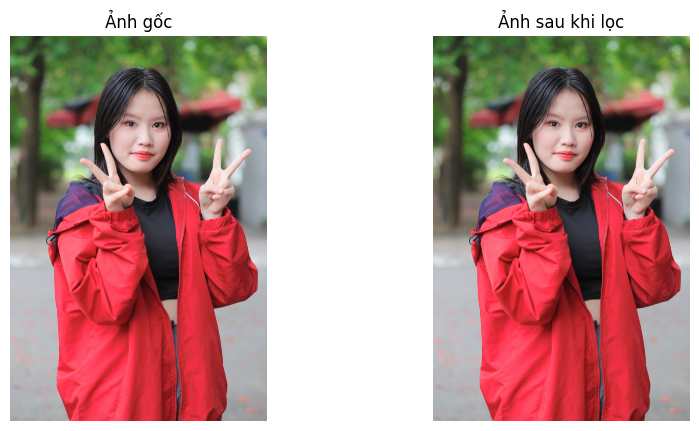

In [4]:
# Import các thư viện cần thiết
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('image.jpg')  # Đọc ảnh màu

# Kiểm tra nếu ảnh không được tải
if image is None:
    print("Không tìm thấy ảnh. Vui lòng kiểm tra đường dẫn hoặc tên file!")
else:
    # Chuyển đổi ảnh từ BGR sang RGB để hiển thị đúng màu sắc
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Định nghĩa kernel (bộ lọc làm mờ trung bình)
    kernel = np.ones((3, 3), np.float32) / 9  # Kernel 3x3 với giá trị trung bình

    # Áp dụng bộ lọc bằng hàm filter2D
    filtered_image = cv2.filter2D(image, -1, kernel)

    # Hiển thị ảnh gốc và ảnh sau khi lọc
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ảnh sau khi lọc")
    plt.imshow(filtered_image)
    plt.axis('off')

    plt.show()



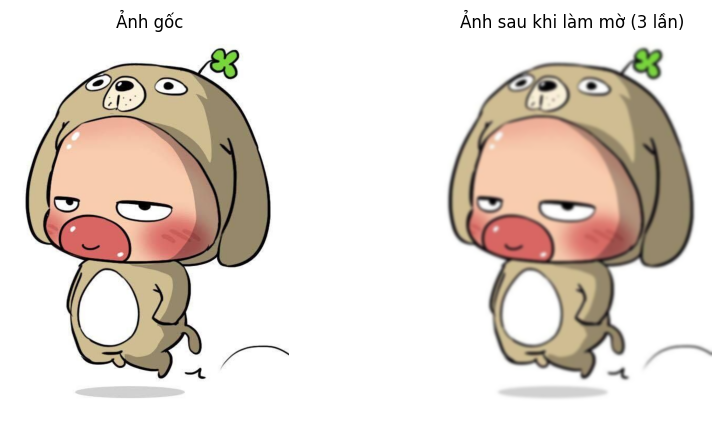

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh màu đầu vào (thay 'image.jpg' bằng đường dẫn chính xác đến ảnh của bạn)
image = cv2.imread('image1.jpg')  # Đọc ảnh màu

# Kiểm tra nếu ảnh không được tải
if image is None:
    print("Không tìm thấy ảnh. Vui lòng kiểm tra đường dẫn hoặc tên file!")
else:
    # Chuyển đổi ảnh từ BGR sang RGB để hiển thị đúng màu sắc
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Thiết lập các thông số làm mờ
    kernel_size = (5, 5)  # Kích thước kernel (tăng lên 5x5)
    num_iterations = 3  # Số lần lặp lại bộ lọc

    # Định nghĩa kernel (bộ lọc làm mờ trung bình)
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])  # Kernel với kích thước mới

    # Áp dụng bộ lọc nhiều lần
    filtered_image = image.copy()
    for i in range(num_iterations):
        filtered_image = cv2.filter2D(filtered_image, -1, kernel)

    # Hiển thị ảnh gốc và ảnh sau khi lọc
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ảnh sau khi làm mờ ({} lần)".format(num_iterations))
    plt.imshow(filtered_image)
    plt.axis('off')

    plt.show()


BỘ LỌC CẠNH
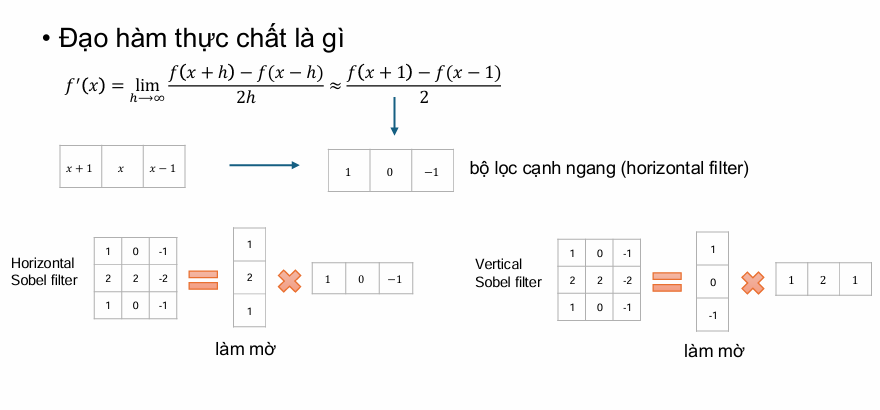

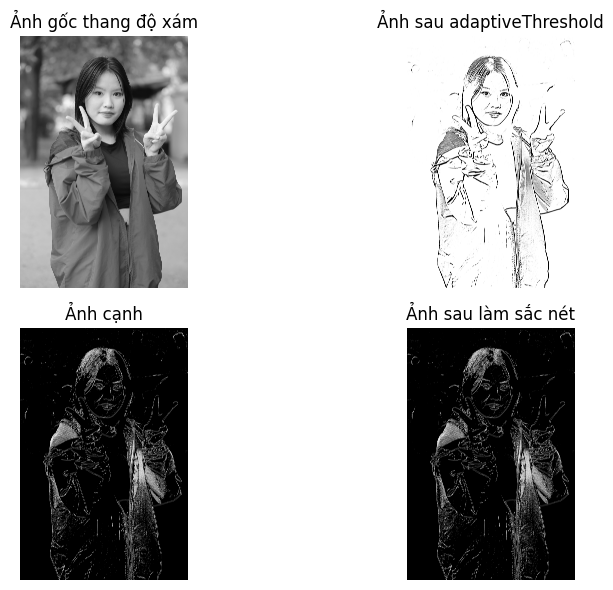

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc
image_path = "image.jpg"
image = cv2.imread(image_path)

# Chuyển ảnh sang grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tăng độ tương phản bằng cách sử dụng equalizeHist
enhanced_gray = cv2.equalizeHist(gray)

# Áp dụng adaptive threshold để làm rõ nét văn bản và loại bỏ ảnh hưởng của ánh sáng không đều
processed = cv2.adaptiveThreshold(enhanced_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

# Áp dụng bộ lọc cạnh để làm nổi bật các cạnh
horizontal_filter = np.array([[1, 0, -1],
                               [1, 0, -1],
                               [1, 0, -1]])
vertical_filter = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

horizontal_edges = cv2.filter2D(processed.astype(np.float32), -1, horizontal_filter)
vertical_edges = cv2.filter2D(processed.astype(np.float32), -1, vertical_filter)

# Kết hợp các cạnh
edges = np.abs(horizontal_edges) + np.abs(vertical_edges)
edges = np.clip(edges, 0, 255).astype(np.uint8)

# Áp dụng bộ lọc làm sắc nét để cải thiện độ rõ nét
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(edges, -1, kernel)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

# Hiển thị ảnh kết quả
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc thang độ xám')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(processed, cmap='gray')
plt.title('Ảnh sau adaptiveThreshold')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title('Ảnh cạnh')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpened, cmap='gray')
plt.title('Ảnh sau làm sắc nét')
plt.axis('off')

plt.tight_layout()
plt.show()

